In [1]:
using Revise
using ConvexHullPricing
using DataFrames
using Plots
using JLD2
using Statistics, JuMP, Gurobi

const UT = ConvexHullPricing.Utilitaries
const OPT = ConvexHullPricing.Optimizer

Set parameter Username
Academic license - for non-commercial use only - expires 2025-01-02
Set parameter Username
Academic license - for non-commercial use only - expires 2025-01-02


ConvexHullPricing.Optimizer

In [2]:
function mon(array)
    result = Float64[]
    last = array[1]
    for elt in array
      new_last = minimum([elt, last])
      push!(result, new_last)
      last = new_last
    end
    return result
end
RANGE = 0:1:900
function refine(valuevec, timevec, trange = RANGE)
    new_values = Float64[]
    for t in trange
        push!(new_values, valuevec[searchsortedfirst(timevec[2:end], t)])
    end
    return new_values
end

refine (generic function with 2 methods)

In [3]:
function load_belgian()
    matrixBLM = []
    matrixBPLM = []
    matrixSUBG = []
    matrixSGEP = []
    matrixDA = []
    matrixDWG = []
    matrixFGM = []
    matrixSUBGL = []
    for idx=1:8
        FS = maximum(load_object("..//results//optimal_values//NewRefinedOptRunBE$(idx).jld2")[3])
        XBLM, ITBLM, BLM, TBLM = load_object("..//results//15min_runs//BundleLevelMethodBE$(idx).jld2")
        XBPLM, ITBPLM, BPLM, TBPLM = load_object("..//results//15min_runs//BundleProximalLevelMethod-L-BE$(idx).jld2")
        XSUBG, ITSUBG, SUBG, TSUBG = load_object("..//results//15min_runs//SubGBE$(idx).jld2")
        XSGEP, ITSGEP, SGEP, TSGEP = load_object("..//results//15min_runs//SubG-EP-BE$(idx).jld2")
        XDA, ITDA, DA, TDA = load_object("..//results//15min_runs//D-AdaptationBE$(idx).jld2")
        XDWG, ITDWG, DWG, TDWG = load_object("..//results//15min_runs//DowGBE$(idx).jld2")
        XFGM, ITFGM, FGM, TFGM = load_object("..//results//15min_runs//FGMBE$(idx).jld2")
        XSUBGL, ITSUBGL, SUBGL, TSUBGL = load_object("..//results//15min_runs//LSUBGBE$(idx).jld2")
        BLM = mon(refine(FS .- BLM, TBLM))
        BPLM = mon(refine(FS .- BPLM, TBPLM))
        SUBG = mon(refine(FS .- SUBG, TSUBG))
        SGEP = mon(refine(FS .- SGEP, TSGEP))
        DA = mon(refine(FS .- DA, TDA))
        DWG = mon(refine(FS .- DWG, TDWG))
        FGM = mon(refine(FS .- FGM, TFGM))
        SUBGL = mon(refine(FS .- SUBGL, TSUBGL))
        push!(matrixBLM, BLM)
        push!(matrixBPLM, BPLM)
        push!(matrixSUBG, SUBG)
        push!(matrixSGEP, SGEP)
        push!(matrixDA, DA)
        push!(matrixDWG, DWG)
        push!(matrixFGM, FGM)
        push!(matrixSUBGL, SUBGL)
    end
    return mean(matrixBLM), mean(matrixBPLM), mean(matrixSUBG), mean(matrixSGEP), mean(matrixDA), mean(matrixDWG), mean(matrixFGM), mean(matrixSUBGL)
end
function load_californian()
    matrixBLM = []
    matrixBPLM = []
    matrixSUBG = []
    matrixSGEP = []
    matrixDA = []
    matrixDWG = []
    matrixFGM = []
    matrixSUBGL = []
    for idx=1:20
        if idx ∉ [9 10 11 12]
        FS = maximum(load_object("..//results//optimal_values//NewRefinedOptRunCA$(idx).jld2")[3])
        XBLM, ITBLM, BLM, TBLM = load_object("..//results//15min_runs//BundleLevelMethodCA$(idx).jld2")
        XBPLM, ITBPLM, BPLM, TBPLM = load_object("..//results//15min_runs//BundleProximalLevelMethod-L-CA$(idx).jld2")
        XSUBG, ITSUBG, SUBG, TSUBG = load_object("..//results//15min_runs//SubGCA$(idx).jld2")
        XSGEP, ITSGEP, SGEP, TSGEP = load_object("..//results//15min_runs//SubG-EP-CA$(idx).jld2")
        XDA, ITDA, DA, TDA = load_object("..//results//15min_runs//D-AdaptationCA$(idx).jld2")
        XDWG, ITDWG, DWG, TDWG = load_object("..//results//15min_runs//DowGCA$(idx).jld2")
        XFGM, ITFGM, FGM, TFGM = load_object("..//results//15min_runs//FGMCA$(idx).jld2")
        XSUBGL, ITSUBGL, SUBGL, TSUBGL = load_object("..//results//15min_runs//LSUBGCA$(idx).jld2")
        BLM = mon(refine(FS .- BLM, TBLM))
        BPLM = mon(refine(FS .- BPLM, TBPLM))
        SUBG = mon(refine(FS .- SUBG, TSUBG))
        SGEP = mon(refine(FS .- SGEP, TSGEP))
        DA = mon(refine(FS .- DA, TDA))
        DWG = mon(refine(FS .- DWG, TDWG))
        FGM = mon(refine(FS .- FGM, TFGM))
        SUBGL = mon(refine(FS .- SUBGL, TSUBGL))
        push!(matrixBLM, BLM)
        push!(matrixBPLM, BPLM)
        push!(matrixSUBG, SUBG)
        push!(matrixSGEP, SGEP)
        push!(matrixDA, DA)
        push!(matrixDWG, DWG)
        push!(matrixFGM, FGM)
        push!(matrixSUBGL, SUBGL)
        end
    end
    return mean(matrixBLM), mean(matrixBPLM), mean(matrixSUBG), mean(matrixSGEP), mean(matrixDA), mean(matrixDWG), mean(matrixFGM), mean(matrixSUBGL)
end

load_californian (generic function with 1 method)

In [4]:
# LOAD BELGIAN
BelgianBLM, BelgianBPLM, BelgianSUBG, BelgianSUBGEP, BelgianDA, BelgianDOWG, BelgianFGM, BelgianSUBGL = load_belgian()
CalifornianBLM, CalifornianBPLM, CalifornianSUBG, CalifornianSUBGEP, CalifornianDA, CalifornianDOWG, CalifornianFGM, CalifornianSUBGL = load_californian()

([153.67619504849426, 153.67619504849426, 153.67619504849426, 153.67619504849426, 153.67619504849426, 153.67619504849426, 153.67619504849426, 153.67619504849426, 153.67619504849426, 153.67619504849426  …  19.081409827340394, 19.081409827340394, 19.081409827340394, 19.081409827340394, 19.081409827340394, 19.081409827340394, 19.081409827340394, 19.081409827340394, 19.081409827340394, 19.081409827340394], [153.67619504861068, 153.67619504861068, 153.67619504861068, 153.67619504861068, 153.67619504861068, 153.67619504861068, 153.67619504861068, 153.67619504861068, 153.67619504861068, 153.67619504861068  …  10.474183014710434, 10.439254308352247, 10.426201395865064, 10.426201395865064, 10.405714034859557, 10.400825368997175, 10.400825368997175, 10.400825368997175, 10.367552514595445, 10.360330620664172], [153.67619504674803, 153.67619504674803, 153.67619504674803, 153.67619504674803, 153.67619504674803, 153.67619504674803, 153.67619504674803, 153.67619504674803, 153.67619504674803, 153.6761

In [10]:
plot(
    title = "Comparing dual methods | Belgian dataset",
    xlabel = "Time (seconds)",
    ylabel = "Functional distance to optimum",
    xlims=(0,900),
    ylims=(0,800),
    xticks=0:120:900,
    xscale=:identity
)
plot!(BelgianBPLM, label = "Bundle Proximal Level Method")
plot!(BelgianBLM, label = "Bundle Level Method")
plot!(BelgianSUBGL, label = "Last-iterate optimal subgradient method")
plot!(BelgianSUBGEP, label = "Subgradient method with estimated Polyak stepsizes")
plot!(BelgianFGM, label = "Fast Gradient Method")
plot!(BelgianSUBG, label = "Subgradient Method")
plot!(BelgianDOWG, label = "DOWG")
plot!(BelgianDA, label = "D-Adaptation")
# savefig("OnePlotBelgian.pdf")

"/home/sofiane/Documents/ConvexHullPricing.jl/notebooks/OnePlotBelgian.pdf"

In [12]:
plot(
    title = "Comparing dual methods | Californian dataset",
    xlabel = "Time (seconds)",
    ylabel = "Functional distance to optimum",
    xlims=(0,900),
    ylims=(0,80),
    xticks=0:120:900
)
plot!(CalifornianBPLM, label = "BPLM")
plot!(CalifornianSUBGL, label = "SUBG-L")
plot!(CalifornianFGM, label = "FGM")
plot!(CalifornianBLM, label = "BLM")
plot!(CalifornianSUBGEP, label = "SUBG-EP")
plot!(CalifornianDOWG, label = "DOWG")
plot!(CalifornianSUBG, label = "SUBG")
plot!(CalifornianDA, label = "DA")
savefig("OnePlotCalifornian.pdf")

"/home/sofiane/Documents/ConvexHullPricing.jl/notebooks/OnePlotCalifornian.pdf"

In [20]:
function load_belgianRel()
    matrixBLM = []
    matrixBPLM = []
    matrixSUBG = []
    matrixSGEP = []
    matrixDA = []
    matrixDWG = []
    matrixFGM = []
    matrixSUBGL = []
    for idx=1:8
        FS = maximum(load_object("..//results//optimal_values//NewRefinedOptRunBE$(idx).jld2")[3])
        XBLM, ITBLM, BLM, TBLM = load_object("..//results//15min_runs//BundleLevelMethodBE$(idx).jld2")
        XBPLM, ITBPLM, BPLM, TBPLM = load_object("..//results//15min_runs//BundleProximalLevelMethod-L-BE$(idx).jld2")
        XSUBG, ITSUBG, SUBG, TSUBG = load_object("..//results//15min_runs//SubGBE$(idx).jld2")
        XSGEP, ITSGEP, SGEP, TSGEP = load_object("..//results//15min_runs//SubG-EP-BE$(idx).jld2")
        XDA, ITDA, DA, TDA = load_object("..//results//15min_runs//D-AdaptationBE$(idx).jld2")
        XDWG, ITDWG, DWG, TDWG = load_object("..//results//15min_runs//DowGBE$(idx).jld2")
        XFGM, ITFGM, FGM, TFGM = load_object("..//results//15min_runs//FGMBE$(idx).jld2")
        XSUBGL, ITSUBGL, SUBGL, TSUBGL = load_object("..//results//15min_runs//LSUBGBE$(idx).jld2")
        F0 = BLM[1]
        BLM = mon(refine((FS .- BLM) ./ (FS - F0), TBLM))
        BPLM = mon(refine((FS .- BPLM) ./ (FS - F0), TBPLM))
        SUBG = mon(refine((FS .- SUBG) ./ (FS - F0), TSUBG))
        SGEP = mon(refine((FS .- SGEP) ./ (FS - F0), TSGEP))
        DA = mon(refine((FS .- DA) ./ (FS - F0), TDA))
        DWG = mon(refine((FS .- DWG) ./ (FS - F0), TDWG))
        FGM = mon(refine((FS .- FGM) ./ (FS - F0), TFGM))
        SUBGL = mon(refine((FS .- SUBGL) ./ (FS - F0), TSUBGL))
        push!(matrixBLM, BLM)
        push!(matrixBPLM, BPLM)
        push!(matrixSUBG, SUBG)
        push!(matrixSGEP, SGEP)
        push!(matrixDA, DA)
        push!(matrixDWG, DWG)
        push!(matrixFGM, FGM)
        push!(matrixSUBGL, SUBGL)
    end
    return mean(matrixBLM), mean(matrixBPLM), mean(matrixSUBG), mean(matrixSGEP), mean(matrixDA), mean(matrixDWG), mean(matrixFGM), mean(matrixSUBGL)
end
function load_californianRel()
    matrixBLM = []
    matrixBPLM = []
    matrixSUBG = []
    matrixSGEP = []
    matrixDA = []
    matrixDWG = []
    matrixFGM = []
    matrixSUBGL = []
    for idx=1:20
        if idx ∉ [9 10 11 12]
        FS = maximum(load_object("..//results//optimal_values//NewRefinedOptRunCA$(idx).jld2")[3])
        XBLM, ITBLM, BLM, TBLM = load_object("..//results//15min_runs//BundleLevelMethodCA$(idx).jld2")
        XBPLM, ITBPLM, BPLM, TBPLM = load_object("..//results//15min_runs//BundleProximalLevelMethod-L-CA$(idx).jld2")
        XSUBG, ITSUBG, SUBG, TSUBG = load_object("..//results//15min_runs//SubGCA$(idx).jld2")
        XSGEP, ITSGEP, SGEP, TSGEP = load_object("..//results//15min_runs//SubG-EP-CA$(idx).jld2")
        XDA, ITDA, DA, TDA = load_object("..//results//15min_runs//D-AdaptationCA$(idx).jld2")
        XDWG, ITDWG, DWG, TDWG = load_object("..//results//15min_runs//DowGCA$(idx).jld2")
        XFGM, ITFGM, FGM, TFGM = load_object("..//results//15min_runs//FGMCA$(idx).jld2")
        XSUBGL, ITSUBGL, SUBGL, TSUBGL = load_object("..//results//15min_runs//LSUBGCA$(idx).jld2")
        F0 = BLM[1]
        BLM = mon(refine((FS .- BLM) ./ (FS - F0), TBLM))
        BPLM = mon(refine((FS .- BPLM) ./ (FS - F0), TBPLM))
        SUBG = mon(refine((FS .- SUBG) ./ (FS - F0), TSUBG))
        SGEP = mon(refine((FS .- SGEP) ./ (FS - F0), TSGEP))
        DA = mon(refine((FS .- DA) ./ (FS - F0), TDA))
        DWG = mon(refine((FS .- DWG) ./ (FS - F0), TDWG))
        FGM = mon(refine((FS .- FGM) ./ (FS - F0), TFGM))
        SUBGL = mon(refine((FS .- SUBGL) ./ (FS - F0), TSUBGL))
        push!(matrixBLM, BLM)
        push!(matrixBPLM, BPLM)
        push!(matrixSUBG, SUBG)
        push!(matrixSGEP, SGEP)
        push!(matrixDA, DA)
        push!(matrixDWG, DWG)
        push!(matrixFGM, FGM)
        push!(matrixSUBGL, SUBGL)
        end
    end
    return mean(matrixBLM), mean(matrixBPLM), mean(matrixSUBG), mean(matrixSGEP), mean(matrixDA), mean(matrixDWG), mean(matrixFGM), mean(matrixSUBGL)
end

load_californianRel (generic function with 1 method)

In [21]:
# LOAD BELGIAN
BelgianRelBLM, BelgianRelBPLM, BelgianRelSUBG, BelgianRelSUBGEP, BelgianRelDA, BelgianRelDOWG, BelgianRelFGM, BelgianRelSUBGL = load_belgianRel()
CalifornianRelBLM, CalifornianRelBPLM, CalifornianRelSUBG, CalifornianRelSUBGEP, CalifornianRelDA, CalifornianRelDOWG, CalifornianRelFGM, CalifornianRelSUBGL = load_californianRel()

([1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0  …  0.15500109969439957, 0.15500109969439957, 0.15500109969439957, 0.15500109969439957, 0.15500109969439957, 0.15500109969439957, 0.15500109969439957, 0.15500109969439957, 0.15500109969439957, 0.15500109969439957], [1.000000000000348, 1.000000000000348, 1.000000000000348, 1.000000000000348, 1.000000000000348, 1.000000000000348, 1.000000000000348, 1.000000000000348, 1.000000000000348, 1.000000000000348  …  0.07506991495610862, 0.07464856250771915, 0.0744893382403537, 0.0744893382403537, 0.07421323233589557, 0.07415434064204758, 0.07415434064204758, 0.07415434064204758, 0.07375352358469167, 0.0736561737560995], [0.9999999999947857, 0.9999999999947857, 0.9999999999947857, 0.9999999999947857, 0.9999999999947857, 0.9999999999947857, 0.9999999999947857, 0.9999999999947857, 0.9999999999947857, 0.9999999999947857  …  0.13923213889235633, 0.1391565341623455, 0.1390941664182258, 0.13903179786239764, 0.13903179786239764, 0.13903179786239764, 0.13

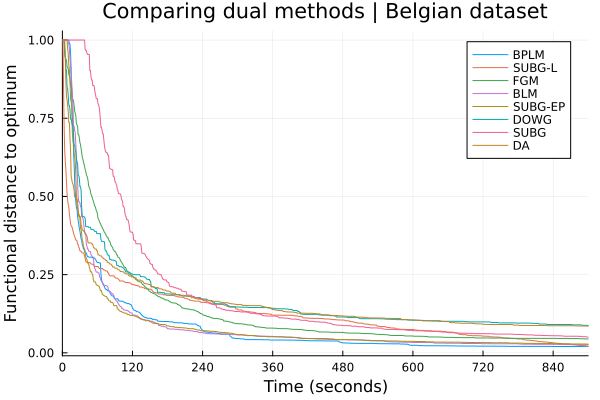

In [22]:
plot(
    title = "Comparing dual methods | Belgian dataset",
    xlabel = "Time (seconds)",
    ylabel = "Functional distance to optimum",
    xlims=(0,900),
    xticks=0:120:900
)
plot!(BelgianRelBPLM, label = "BPLM")
plot!(BelgianRelSUBGL, label = "SUBG-L")
plot!(BelgianRelFGM, label = "FGM")
plot!(BelgianRelBLM, label = "BLM")
plot!(BelgianRelSUBGEP, label = "SUBG-EP")
plot!(BelgianRelDOWG, label = "DOWG")
plot!(BelgianRelSUBG, label = "SUBG")
plot!(BelgianRelDA, label = "DA")

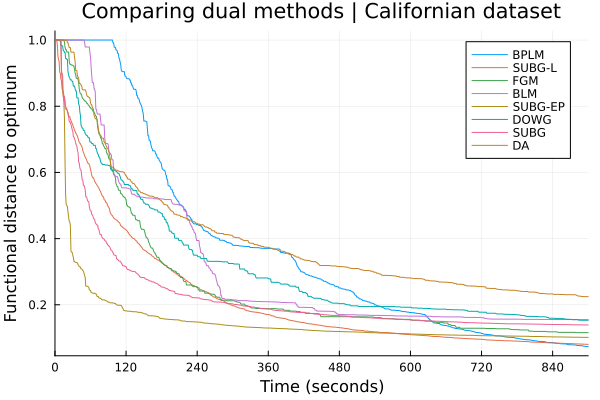

In [16]:
plot(
    title = "Comparing dual methods | Californian dataset",
    xlabel = "Time (seconds)",
    ylabel = "Functional distance to optimum",
    xlims=(0,900),
    xticks=0:120:900
)
plot!(CalifornianRelBPLM, label = "BPLM")
plot!(CalifornianRelSUBGL, label = "SUBG-L")
plot!(CalifornianRelFGM, label = "FGM")
plot!(CalifornianRelBLM, label = "BLM")
plot!(CalifornianRelSUBGEP, label = "SUBG-EP")
plot!(CalifornianRelDOWG, label = "DOWG")
plot!(CalifornianRelSUBG, label = "SUBG")
plot!(CalifornianRelDA, label = "DA")